In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# setup params for brownian motion
s0 = 131.00  # starting price at t=0
sigma = 0.25  # volatility
mu = 0.35  # drift parameter

# setup the simulation
paths = 1000
delta = 1.0/252.0   # daily (i.e. 252 trading days annually)
time = 252 * 5  # 5 year simulation

In [5]:
def wiener_process(delta, sigma, time, paths):
    """
    Returns a Wiener process
    
    @param: delta : float - The increment to downsample sigma
    @param: sigma : float - Percentage volatility
    @param: time : int - Number of samples to create
    @param: paths : int - Number of price simulations to create
    
    Returns: wiener_process : np.ndarray
    
    This method returns a Wiener process. 
    The Wiener process is also called Brownian 
    motion. For more information about the 
    Wiener process check out the Wikipedia 
    page: http://en.wikipedia.org/wiki/Wiener_process
    """    
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))

In [6]:
def gbm_returns(delta, sigma, time, mu, paths):
    """
    Returns from a Geometric brownian motion
    
    @param: delta : float - The increment to downsample sigma
    @param: sigma : float - Percentage volatility
    @param: time : int - Number of samples to create
    @param: mu : float - Percentage drift
    @param: paths : int - Number of price simulations to create
    
    Returns: gbm_returns : np.ndarray
    This method constructs random Geometric Brownian 
    Motion (GBM).
    """
    process = wiener_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma**2 / 2) * delta
    )

In [7]:
def gbm_levels(s0, delta, sigma, time, mu, paths):
    """
    Returns price paths starting at s0
    
    @param: s0 : float - The starting stock price
    @param: delta : float - The increment to downsample sigma
    @param: sigma : float - Percentage volatility
    @param: time : int - Number of samples to create
    @param: mu : float - Percentage drift
    @param: paths : int - Number of price simulations to create
    
    Returns
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)
    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

In [11]:
returns = gbm_returns(delta, sigma, time, mu, paths)
stacked = np.vstack([np.ones(paths), returns])

    

In [12]:
returns

array([[1.0058237 , 1.00189331, 0.98887508, ..., 1.00629621, 1.01345036,
        1.028122  ],
       [0.97370739, 1.0006351 , 0.98267532, ..., 1.00739748, 1.00590765,
        0.9982606 ],
       [1.0087542 , 1.02842365, 0.97643951, ..., 1.01624147, 0.9911867 ,
        0.99767834],
       ...,
       [1.00553355, 1.01699123, 1.02961924, ..., 1.00815359, 1.00349847,
        1.0026415 ],
       [1.00381104, 0.99761206, 1.00878144, ..., 1.00430597, 1.01008661,
        0.99425469],
       [0.99628749, 0.98968966, 1.02632496, ..., 1.01171138, 0.9930482 ,
        0.9933146 ]])

In [22]:
stacked

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.0058237 , 1.00189331, 0.98887508, ..., 1.00629621, 1.01345036,
        1.028122  ],
       [0.97370739, 1.0006351 , 0.98267532, ..., 1.00739748, 1.00590765,
        0.9982606 ],
       ...,
       [1.00553355, 1.01699123, 1.02961924, ..., 1.00815359, 1.00349847,
        1.0026415 ],
       [1.00381104, 0.99761206, 1.00878144, ..., 1.00430597, 1.01008661,
        0.99425469],
       [0.99628749, 0.98968966, 1.02632496, ..., 1.01171138, 0.9930482 ,
        0.9933146 ]])

In [16]:
len(stacked)

1261

In [18]:
len(returns)

1260

In [20]:
s0 * stacked.cumprod(axis=0)

array([[ 131.        ,  131.        ,  131.        , ...,  131.        ,
         131.        ,  131.        ],
       [ 131.76290458,  131.24802388,  129.54263574, ...,  131.82480402,
         132.76199776,  134.68398249],
       [ 128.2985144 ,  131.33137959,  127.2983516 , ...,  132.7999759 ,
         133.54630952,  134.44971382],
       ...,
       [ 276.3311516 ,  963.8872415 ,  465.6601533 , ...,  894.17175027,
        1146.46650785,  864.44478965],
       [ 277.38426124,  961.58553848,  469.74931963, ...,  898.02202954,
        1158.0304632 ,  859.4782884 ],
       [ 276.35446948,  951.67126143,  482.11545005, ...,  908.53910603,
        1149.98006299,  853.73233041]])

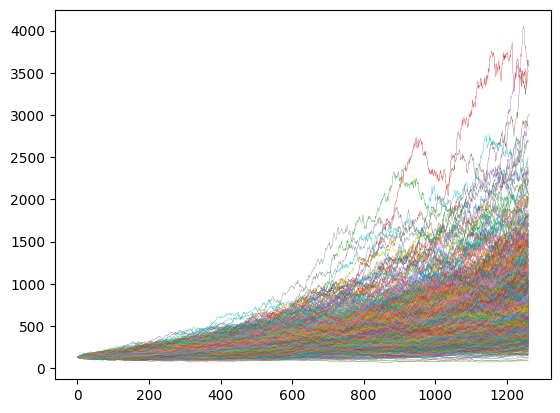

In [8]:
# Original drift of 0.35
price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

In [9]:
len(price_paths[-1, price_paths[-1, :] > s0])

995

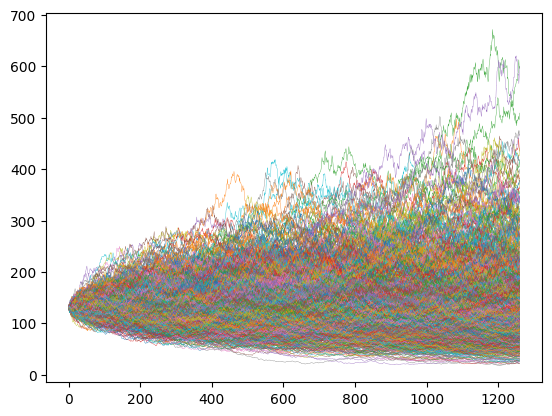

In [10]:
# Updated drift of 0
price_paths = gbm_levels(s0, delta, sigma, time, 0.0, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()